In [1]:
import seaborn as sn
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'seaborn'

In [4]:
!pip install seaborn

In [3]:
import seaborn as sn
import pandas as pd
import numpy as np

In [5]:
path = "/Users/18165/Desktop/principles of data science/PDS_Assignments-1/1.1/raw_data/raw_data.csv"
data = pd.read_csv(path)

In [6]:
data.head()

,Height (Inches),Weight (Pounds),Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [7]:
data.isnull().sum()

Height (Inches)    0
Weight (Pounds)    0
Age                0
Grip strength      0
Frailty            0
dtype: int64

In [8]:
#renaming columns
data = data.rename(columns={"Height (Inches)": "Height", "Weight (Pounds)": "Weight"})


In [9]:
data.head()

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [10]:
#convert Frailty to binary

from sklearn.preprocessing import LabelEncoder
l = LabelEncoder() 

data['Frailty']=l.fit_transform(data['Frailty'])
data.head()

ModuleNotFoundError: No module named 'sklearn'

In [11]:
!pip install sklearn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  
  If the previous advice does not cover your use 

In [12]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f1/7d/2e562207176a5dcdad513085670674bb11ffaf37e1393eacb6d7fb502481/scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/06/15/e73734f9170b66c6a84a0bd7e03586e87e77404e2eb8e34749fc49fa43f7/scipy-1.11.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.1 kB ? eta -:--:--
     ---------------------------------------- 59.1/59.1 kB 1.0 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f72

In [13]:
#convert Frailty to binary

from sklearn.preprocessing import LabelEncoder
l = LabelEncoder() 

data['Frailty']=l.fit_transform(data['Frailty'])
data.head()

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,0
1,71.5,136,19,31,0
2,69.4,153,45,29,0
3,68.2,142,22,28,1
4,67.8,144,29,24,1


In [14]:
data.to_csv('/Users/18165/Desktop/principles of data science/PDS_Assignments-1/1.1/clean_data.csv')

In [15]:
data.head()


,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,0
1,71.5,136,19,31,0
2,69.4,153,45,29,0
3,68.2,142,22,28,1
4,67.8,144,29,24,1


In [16]:
# Split dataset into independent and dependent variables
A=data.iloc[:,:-1]
B=data.iloc[:,-1]

In [17]:
A

,Height,Weight,Age,Grip strength
0,65.8,112,30,30
1,71.5,136,19,31
2,69.4,153,45,29
3,68.2,142,22,28
4,67.8,144,29,24
5,68.7,123,50,26
6,69.8,141,51,22
7,70.1,136,23,20
8,67.9,112,17,19
9,66.8,120,39,31


In [18]:
B

0    0
1    0
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: Frailty, dtype: int32

In [19]:
#split train and test
from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test = train_test_split(
    A, B, test_size=0.2, random_state= 7)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
X_train = StandardScaler()

In [22]:
A_train = X_train.fit_transform(A_train)


In [23]:
X_test = StandardScaler()
A_test = X_test.fit_transform(A_test)

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)

In [25]:
model.fit(A,B)

LogisticRegression(random_state=0, solver='liblinear')

In [26]:
predictions = model.predict(A_test)

C:\Users\18165\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [27]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', random_state=0, solver='liblinear')

In [28]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(A,B)

In [29]:
model.classes_

array([0, 1])

In [30]:
model.score(A,B)

1.0

In [31]:
model.predict(A)

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [32]:
model.predict_proba(A)

array([[9.99992228e-01, 7.77234095e-06],
       [9.89416711e-01, 1.05832893e-02],
       [5.20673368e-01, 4.79326632e-01],
       [3.38680800e-01, 6.61319200e-01],
       [2.09102109e-02, 9.79089789e-01],
       [9.99775967e-01, 2.24032875e-04],
       [3.34717425e-01, 6.65282575e-01],
       [9.93988103e-03, 9.90060119e-01],
       [7.81253207e-01, 2.18746793e-01],
       [9.99989509e-01, 1.04910945e-05]])

In [33]:
import matplotlib.pyplot as plt


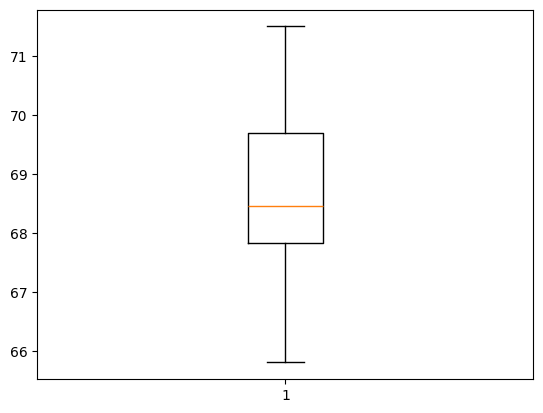

In [35]:
plt.boxplot(data.Height)
plt.savefig('/Users/18165/Desktop/principles of data science/PDS_Assignments-1/1.1/results/height_distribution.png')